In [2]:
import numpy as np 
import quantecon as qe 
import matplotlib.pyplot as plt 
%matplotlib inline

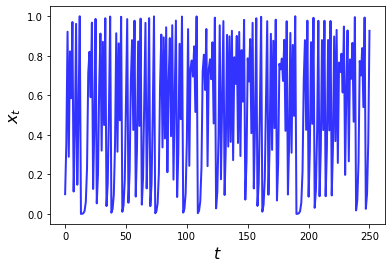

In [3]:
alphas = 4.0
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = alphas * x[t] * (1 - x[t])
    return x

x = qm(0.1, 250)
fig, ax = plt.subplots()
ax.plot(x, 'b-', lw=2, alpha=0.8)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x_{t}$', fontsize=16)
plt.show()

In [4]:
from numba import jit

qm_numba = jit(qm)

In [5]:
n = 10000000

qe.tic()
qm(0.1, int(n))
time1 = qe.toc()

TOC: Elapsed: 0:00:17.34


In [6]:
qe.tic()
qm_numba(0.1, int(n))
time2 = qe.toc()

TOC: Elapsed: 0:00:0.26


In [7]:
qe.tic()
qm_numba(0.1, int(n))
time3 = qe.toc()

TOC: Elapsed: 0:00:0.06


In [9]:
time1 / time3

252.03901174856477

In [10]:
@jit
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = alphas * x[t] * (1 - x[t])
    return x

In [11]:
qm(0.1, 10)

array([0.1       , 0.36      , 0.9216    , 0.28901376, 0.82193923,
       0.58542054, 0.97081333, 0.11333925, 0.40197385, 0.9615635 ,
       0.14783656])

In [12]:
from numba import njit

@njit
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
        x[t+1] = alphas * x[t] * (1 - x[t])
    return x